In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
import matplotlib.pylab as plt
import math
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression


In [3]:
sales_df=pd.read_csv('cleaned_sales_data.csv')
rental_df=pd.read_csv('cleaned_rent_data.csv')
sales_df.head()

,Unnamed: 0,Address,Price,Beds,Baths,Area_Sqft,City,Zipcode,Time_on_Redfin(days),Property Type,Year_built,Community,Lot_Size_Sqft,Est_Monthly_Payt,Est_Redfin_Price,Price/Sq.Ft.,Buyer_Agent_Commission,HOA_Dues,Style
0,0,"41247 Apricot Ln,Fremont, CA 94539",1999888,4,2.0,1698,Fremont,94539,5,Single Family Residential,1960,FREMONT,6720,14526,2134398,1178,2,0,Unknown
1,1,"34116 Pavia Ter,Fremont, CA 94555",1180000,3,3.5,1387,Fremont,94555,1,Condo,2012,ARDENWOOD AREA,39639,8855,1161551,851,2,284,Contemporary
2,2,"36778 Oak St,Fremont, CA 94536",1499888,3,2.0,1610,Fremont,94536,1,Single Family Residential,1961,FAIR OAKS,6978,10894,1513958,932,2,0,Ranch
3,3,"4046 Abbey Ter #113,Fremont, CA 94536",598500,2,2.0,823,Fremont,94536,1,Condo,1986,CENTRAL PARK,25264,4757,598791,727,2,410,Contemporary
4,4,"345 Torrano Cmn,Fremont, CA 94536",799888,2,1.0,1016,Fremont,94536,1,Townhouse,1975,NILES THE TREES,2448,6150,798177,787,2,340,Unknown


In [3]:
rental_df.head()

,Unnamed: 0,Address,Price,Beds,Baths,Area_Sqft,City,Zipcode,Parking_Size,In_Unit_Aminity_Count,Community_Aminity_Count
0,0,"Palmia, Aged 55+ Luxury Apartments47207 Missio...",3020,2,2.0,927.5,Fremont,94539,1,9,9
1,1,"Creekside Village2999 Sequoia Ter,Fremont, CA ...",2551,2,2.0,775.0,Fremont,94536,1,15,25
2,2,"Sundale North And South39900 Blacow Rd,Fremont...",2250,2,1.5,805.5,Fremont,94538,1,10,12
3,3,"39993 Fremont Blvd,Fremont, CA 94538",2300,1,1.0,931.0,Fremont,94538,0,10,2
4,4,"Pebble Creek Communities40777 High St,Fremont,...",2430,2,1.0,774.0,Fremont,94538,1,14,12


In [4]:
#Decribing sales data
sales_df.describe()

,Unnamed: 0,Price,Beds,Baths,Area_Sqft,Zipcode,Time_on_Redfin(days),Lot_Size_Sqft,Est_Monthly_Payt,Est_Redfin_Price,Buyer_Agent_Commission,HOA_Dues
count,1937.000000,1.937000e+03,1937.000000,1937.000000,1937.000000,1937.000000,1937.000000,1.937000e+03,1937.000000,1.937000e+03,1937.000000,1937.000000
mean,968.000000,1.527432e+06,3.272586,2.402426,1930.287042,94620.591120,42.009293,2.916039e+04,11351.381002,1.469275e+06,2.484566,311.078472
std,559.308055,1.650292e+06,2.192926,1.872217,1742.552955,346.968395,75.474367,2.546181e+05,11895.792088,1.392513e+06,0.213428,912.610979
min,0.000000,0.000000e+00,0.000000,0.000000,380.000000,94002.000000,0.000000,1.000000e+02,327.000000,3.845400e+04,0.330000,0.000000
25%,484.000000,6.950000e+05,2.000000,2.000000,1140.000000,94403.000000,5.000000,4.400000e+03,5575.000000,7.271640e+05,2.484566,0.000000
50%,968.000000,1.150000e+06,3.000000,2.000000,1560.000000,94590.000000,17.000000,6.800000e+03,8353.000000,1.265284e+06,2.500000,0.000000
75%,1452.000000,1.698900e+06,4.000000,3.000000,2243.000000,94903.000000,44.000000,2.916039e+04,12643.000000,1.594973e+06,2.500000,338.000000
max,1936.000000,1.975000e+07,56.000000,49.500000,43760.000000,95148.000000,809.000000,1.054152e+07,143453.000000,1.614532e+07,5.000000,7331.000000


In [5]:
#Describing the rent data
rental_df.describe()

,Unnamed: 0,Price,Beds,Baths,Area_Sqft,Zipcode,Parking_Size,In_Unit_Aminity_Count,Community_Aminity_Count
count,1289.000000,1.289000e+03,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000
mean,644.000000,4.211580e+04,2.501939,1.915826,1309.422033,94172.433670,0.141971,3.283941,2.077580
std,372.246558,2.592661e+05,4.704320,2.927384,2291.162879,6698.325674,0.472061,3.806671,3.920626
min,0.000000,0.000000e+00,0.000000,0.000000,121.000000,-6667.000000,0.000000,0.000000,0.000000
25%,322.000000,2.200000e+03,1.000000,1.000000,700.000000,94536.000000,0.000000,1.000000,0.000000
50%,644.000000,2.795000e+03,2.000000,1.000000,934.000000,94606.000000,0.000000,2.000000,1.000000
75%,966.000000,3.795000e+03,3.000000,2.000000,1360.000000,94903.000000,0.000000,4.000000,2.000000
max,1288.000000,4.938420e+06,126.000000,45.000000,42794.000000,95148.000000,4.000000,21.000000,25.000000


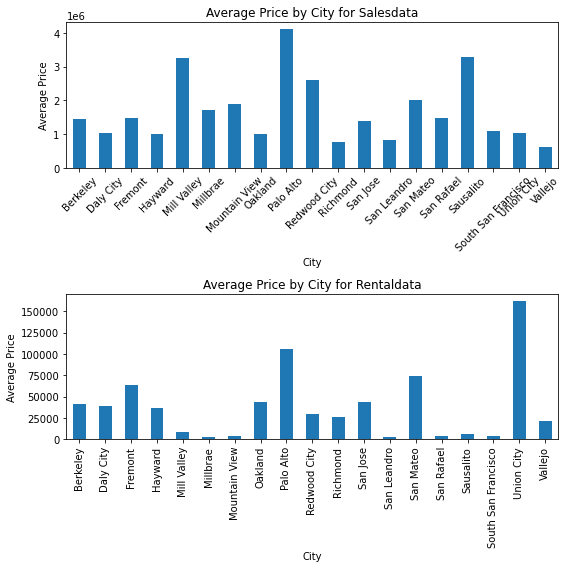

In [6]:
#Comparing city and price for sales and rental------??????
fig, axs = plt.subplots(2, 1, figsize=(8, 8))

avg_prices_by_city1 = sales_df.groupby('City')['Price'].mean()
avg_prices_by_city1.plot(kind='bar', ax=axs[0], rot=45)
axs[0].set_xlabel('City')
axs[0].set_ylabel('Average Price')
axs[0].set_title('Average Price by City for Salesdata')
plt.xticks(rotation=90)

avg_prices_by_city2 = rental_df.groupby('City')['Price'].mean()
avg_prices_by_city2.plot(kind='bar', ax=axs[1], rot=45)
axs[1].set_xlabel('City')
axs[1].set_ylabel('Average Price')
axs[1].set_title('Average Price by City for Rentaldata')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

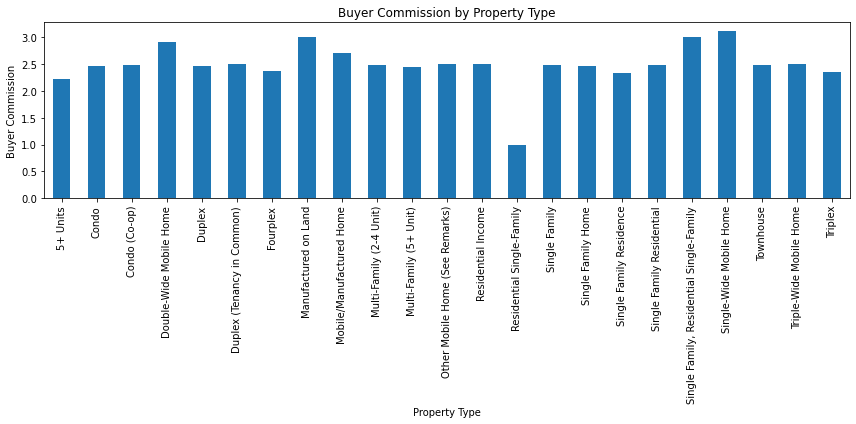

In [7]:
#Buyer Commission by Property Type
BC_PT = sales_df.groupby('Property Type')['Buyer_Agent_Commission'].mean()
BC_PT.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Property Type')
plt.ylabel('Buyer Commission')
plt.title('Buyer Commission by Property Type')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [8]:
sales_df['Property Type'].value_counts()

Single Family Residential                   620
Single Family Home                          455
Condo                                       455
Townhouse                                   161
Multi-Family (2-4 Unit)                     100
Mobile/Manufactured Home                     33
Duplex                                       22
Double-Wide Mobile Home                      22
Fourplex                                     17
5+ Units                                     13
Multi-Family (5+ Unit)                        8
Triplex                                       7
Single Family Residence                       6
Condo (Co-op)                                 4
Single-Wide Mobile Home                       4
Triple-Wide Mobile Home                       3
Manufactured on Land                          1
Single Family, Residential Single-Family      1
Residential Income                            1
Single Family                                 1
Duplex (Tenancy in Common)              

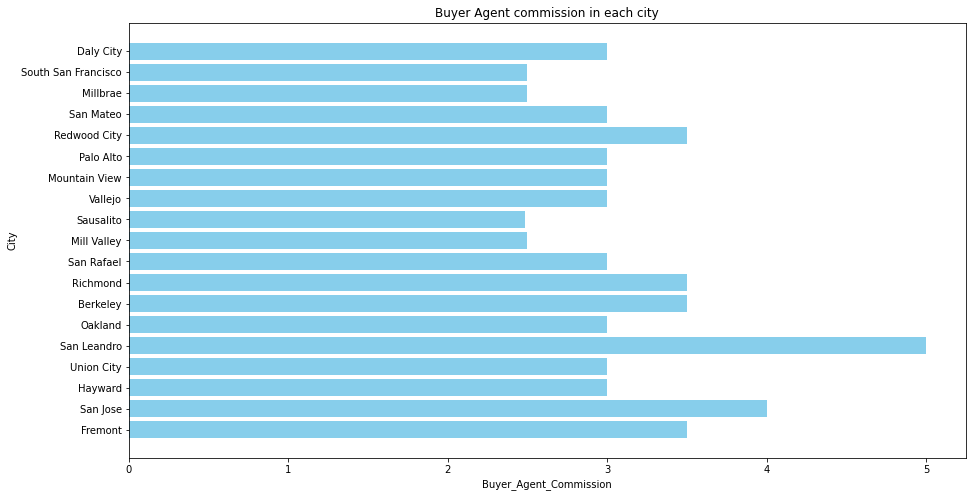

In [9]:
#>>> In here we check which city has higher rate of Agent commission.
plt.figure(figsize=(15, 8))
plt.barh(sales_df['City'], sales_df['Buyer_Agent_Commission'], color='skyblue')
plt.xlabel('Buyer_Agent_Commission')
plt.ylabel('City')
plt.title('Buyer Agent commission in each city')
plt.show()


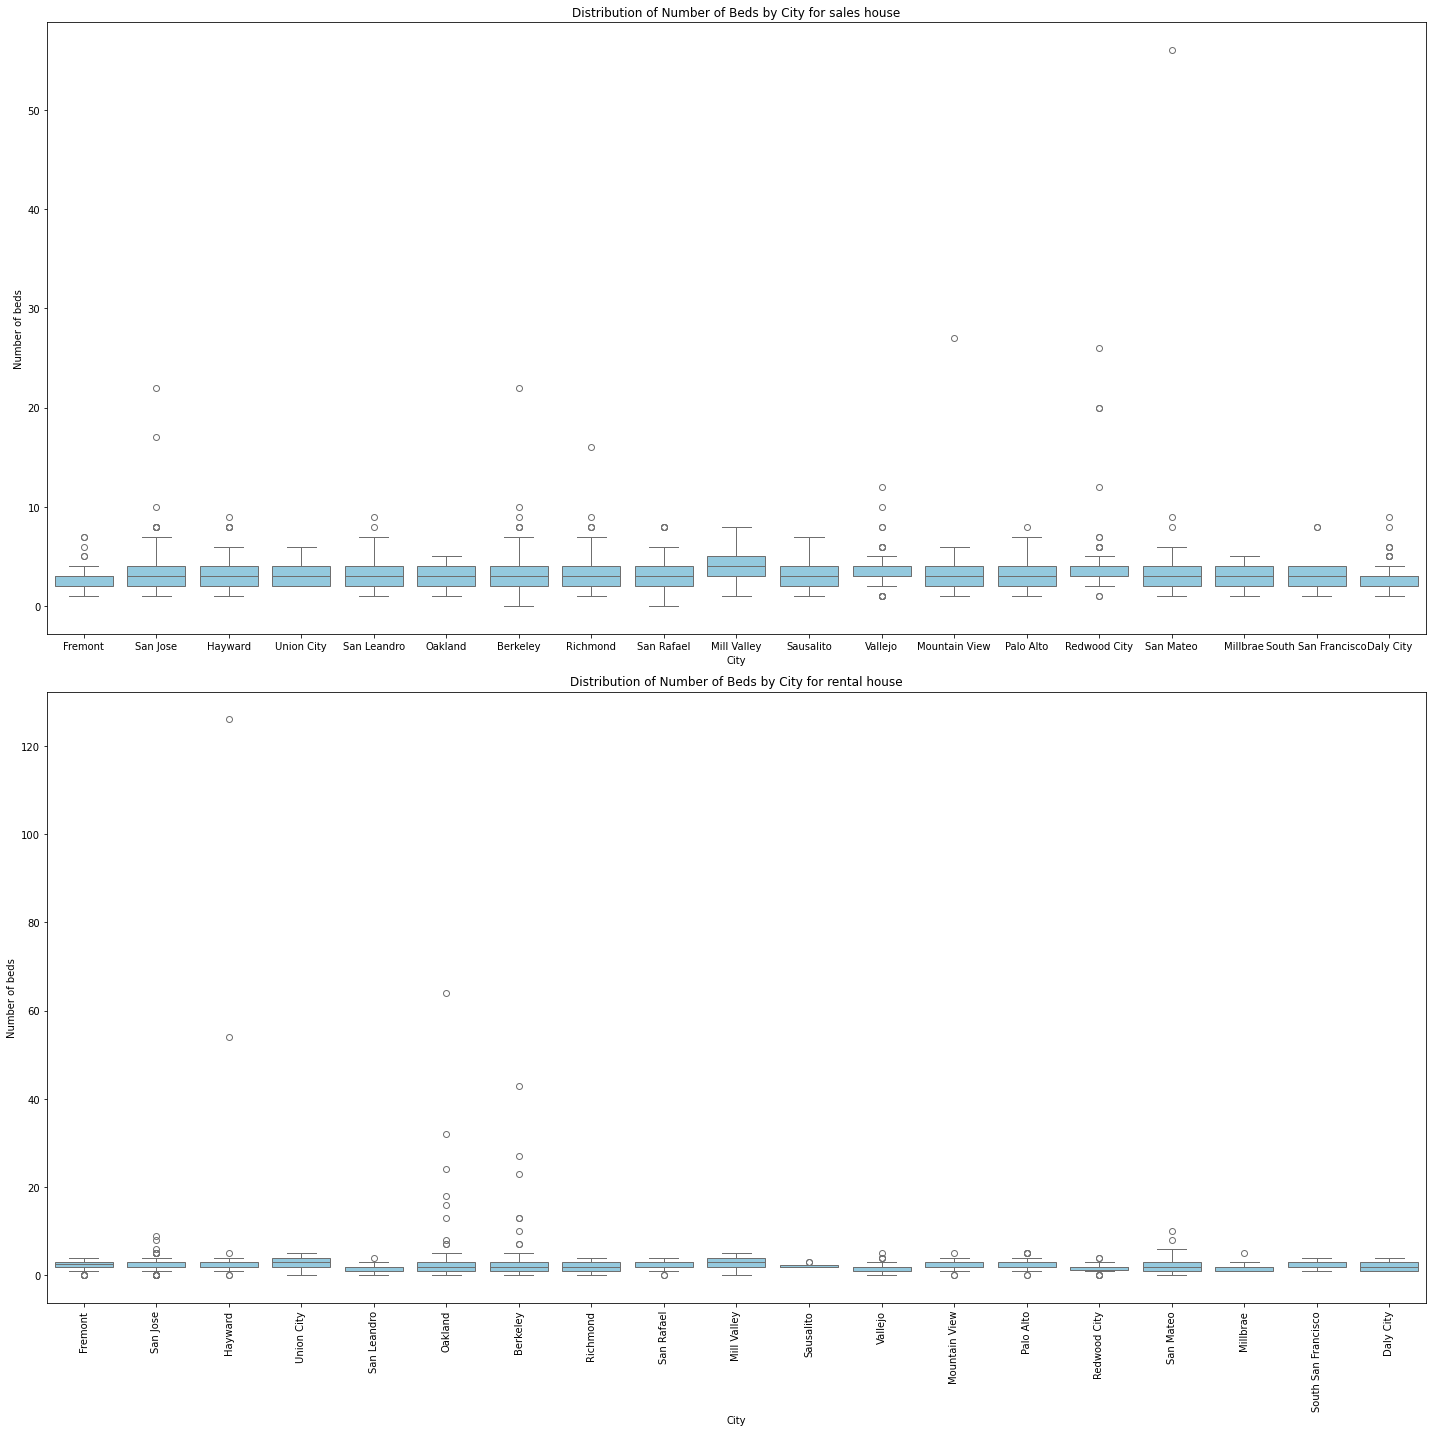

In [10]:
#>>>Comparing No of beds in each city-sales house
#>>>can mention that the cities which doent have any outliers.
fig, axs = plt.subplots(2, 1, figsize=(20, 20))
no_beds_wrt_citysales = sns.boxplot(x='City', y='Beds', data=sales_df, color='skyblue',ax=axs[0])

axs[0].set_xlabel('City')
axs[0].set_ylabel('Number of beds')
axs[0].set_title('Distribution of Number of Beds by City for sales house')
no_beds_wrt_city_rent = sns.boxplot(x='City', y='Beds', data=rental_df, color='skyblue',ax=axs[1])
plt.xticks(rotation=90)
axs[1].set_xlabel('City')
axs[1].set_ylabel('Number of beds')
axs[1].set_title('Distribution of Number of Beds by City for rental house')
plt.tight_layout() 
plt.show()


In [11]:
sales_df=sales_df[sales_df['Beds']<=5]
sales_df=sales_df[sales_df['Beds']>=1]
rental_df=rental_df[rental_df['Beds']<=5]
rental_df=rental_df[rental_df['Beds']>=1]

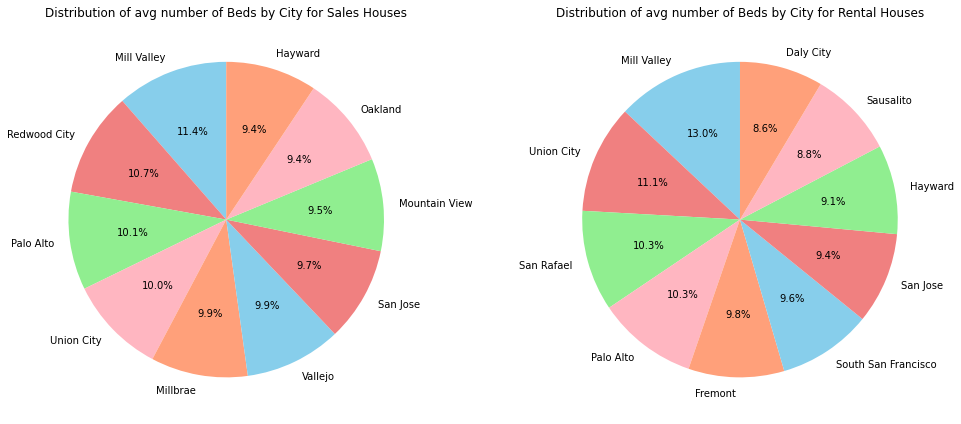

In [12]:
#>>>In here we  plot which of the top 10 cities has more average number of beds of Both Rental and Sales.
###Calculating the average number of beds for each city
avg_BC_sales = sales_df.groupby('City')['Beds'].mean()
# Sort the data by the average number of beds in descending order
sort_data = avg_BC_sales.sort_values(ascending=False)
t10_city_sales = sort_data.head(10)

avg_BC_rent = rental_df.groupby('City')['Beds'].mean()
# Sort the data by the average number of beds in descending order
sort_data = avg_BC_rent.sort_values(ascending=False)
t10_city_rent = sort_data.head(10)

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
axs[0].pie(t10_city_sales, labels=t10_city_sales.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen', 'lightpink', 'lightsalmon'])
axs[0].set_title('Distribution of avg number of Beds by City for Sales Houses')

axs[1].pie(t10_city_rent, labels=t10_city_rent.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen', 'lightpink', 'lightsalmon'])
axs[1].set_title('Distribution of avg number of Beds by City for Rental Houses')

plt.tight_layout()  # Ensures proper spacing between subplots
plt.show()

In [13]:
sales_df = sales_df.rename(columns={'Price/Sq.Ft.': 'Price_sqft'})


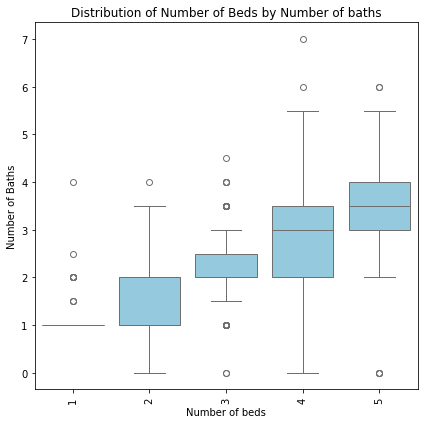

In [15]:
#Distribution of Number of Beds by Number of baths for sales
plt.figure(figsize=(6, 6))
no_beds_wrt_city = sns.boxplot(x='Beds', y='Baths', data=sales_df, color='skyblue',)
plt.xticks(rotation=90)
plt.xlabel('Number of beds')
plt.ylabel('Number of Baths')
plt.title('Distribution of Number of Beds by Number of baths')
plt.tight_layout() 
plt.show()

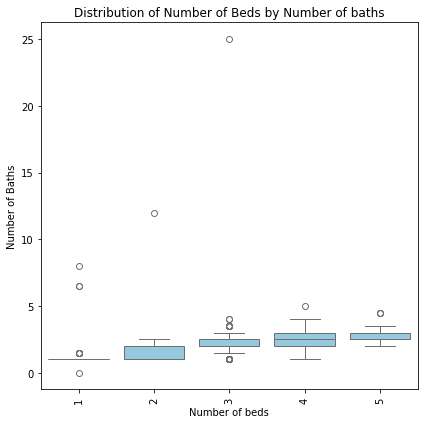

In [16]:
#Distribution of Number of Beds by Number of baths for rent
plt.figure(figsize=(6, 6))
no_beds_wrt_city = sns.boxplot(x='Beds', y='Baths', data=rental_df, color='skyblue',)
plt.xticks(rotation=90)
plt.xlabel('Number of beds')
plt.ylabel('Number of Baths')
plt.title('Distribution of Number of Beds by Number of baths')
plt.tight_layout() 
plt.show()

In [17]:
#crosstabs between city and no of beds 
cross_tab = pd.crosstab(sales_df['Beds'], sales_df['City'])
cross_tab

City,Berkeley,Daly City,Fremont,Hayward,Mill Valley,Millbrae,Mountain View,Oakland,Palo Alto,Redwood City,Richmond,San Jose,San Leandro,San Mateo,San Rafael,Sausalito,South San Francisco,Union City,Vallejo
Beds,,,,,,,,,,,,,,,,,,,
1,11,4,8,8,1,1,4,6,2,2,12,20,6,18,26,2,1,0,5
2,23,25,57,25,7,4,22,5,22,16,46,81,27,52,23,9,9,8,33
3,31,26,71,44,12,7,21,14,17,33,55,125,26,27,30,6,16,9,60
4,21,8,33,24,13,2,16,9,23,32,38,87,12,29,28,7,8,8,43
5,3,4,2,5,11,3,6,3,7,11,6,24,3,7,13,2,0,2,8


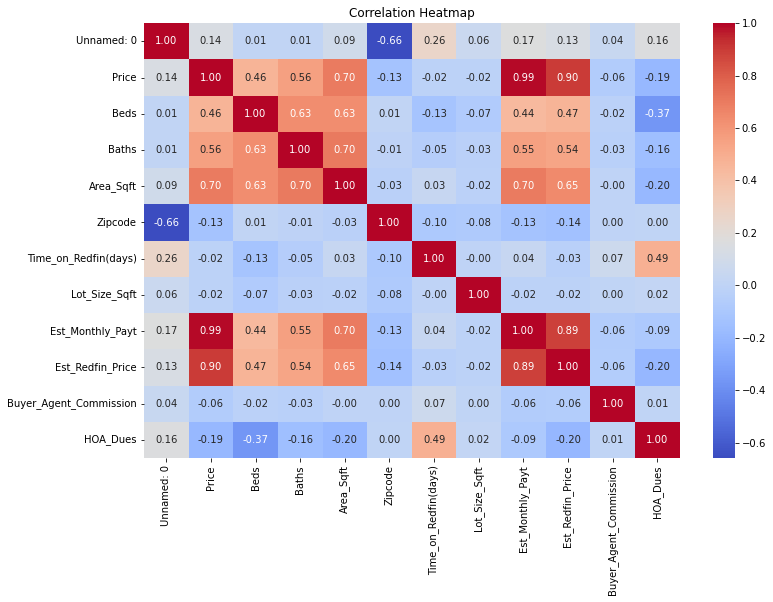

In [18]:
#Heat map
correlation_matrix = sales_df.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Set the plot title
plt.title('Correlation Heatmap')

# Show the heatmap
plt.show()











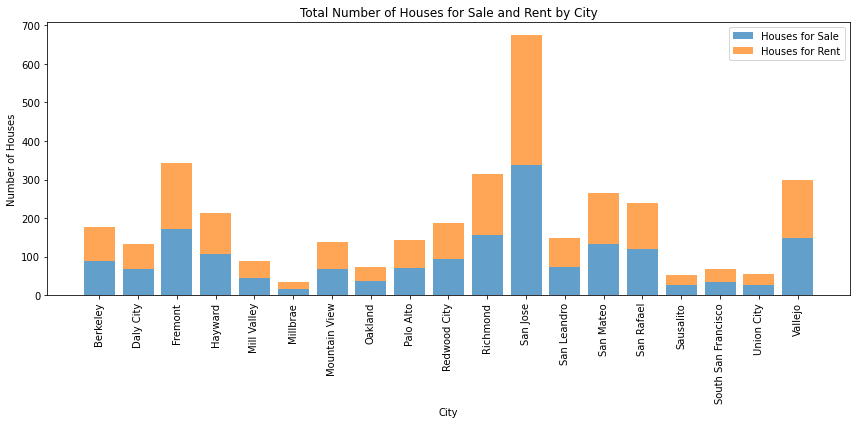

In [19]:
#total number of houses are there in each city for sale or rent.
tot_houses = sales_df.groupby('City').size() + rental_df.groupby('City').size()
houses_sale = sales_df.groupby('City').size()
houses_rent = sales_df.groupby('City').size()
# Create a stacked bar chart
plt.figure(figsize=(12, 6))
p1 = plt.bar(tot_houses.index, houses_sale, label='Houses for Sale', alpha=0.7)
p2 = plt.bar(tot_houses.index, houses_rent, bottom=houses_sale, label='Houses for Rent', alpha=0.7)
plt.xlabel('City')
plt.ylabel('Number of Houses')
plt.title('Total Number of Houses for Sale and Rent by City')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


Text(0, 0.5, 'Count')

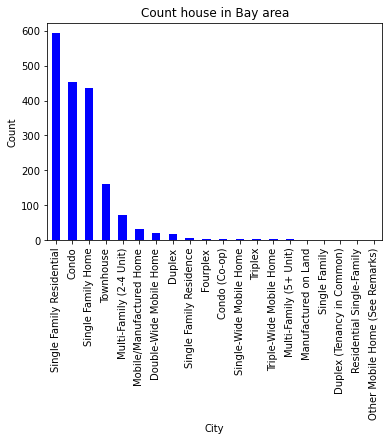

In [20]:
#WHat type of properties available more in bay area for sales
property_type=sales_df['Property Type'].value_counts() 
property_type.plot(kind="bar",color='b')
plt.title('Count house in Bay area')
plt.xlabel('City')
plt.ylabel('Count')

C:\Users\apara\AppData\Local\Temp\ipykernel_33536\881530856.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='City', y='Property_Age_Group', data=sales_df, estimator=lambda x: len(x) / len(sales_df) * 100, palette='coolwarm')


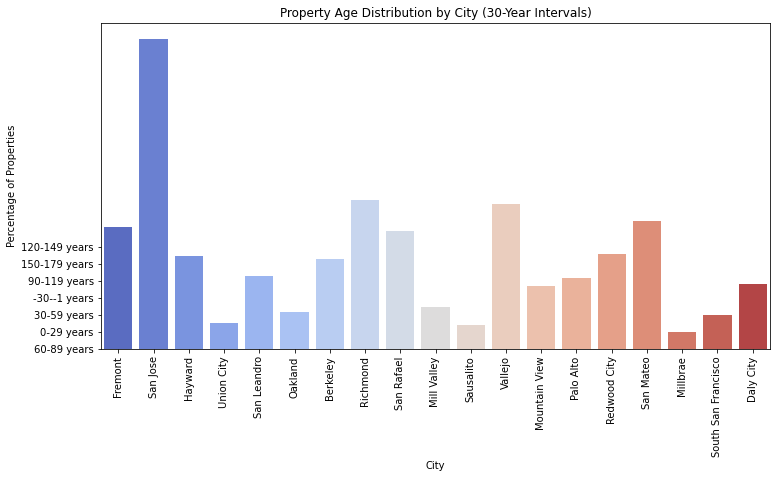

In [21]:
#>>>not crct please check>> the graph
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


values_to_drop = ['Unknown']

sales_df = sales_df[~sales_df['Year_built'].isin(values_to_drop)]
current_year = 2023  # Replace with the current year

sales_df['Year_built'] = sales_df['Year_built'].apply(lambda x: int(float(x)))
sales_df['Property_Age'] = current_year - sales_df['Year_built']

# Group properties by City and Property Age in 30-year intervals
sales_df['Property_Age_Group'] = sales_df['Property_Age'] // 30 * 30

# Define custom labels for the y-axis ticks
age_group_labels = [f"{group}-{group+29} years" for group in sales_df['Property_Age_Group'].unique()]

# Create a bar plot to visualize property ages by city
plt.figure(figsize=(12, 6))
sns.barplot(x='City', y='Property_Age_Group', data=sales_df, estimator=lambda x: len(x) / len(sales_df) * 100, palette='coolwarm')
plt.title('Property Age Distribution by City (30-Year Intervals)')
plt.xlabel('City')
plt.ylabel('Percentage of Properties')
plt.xticks(rotation=90)
plt.yticks(range(len(age_group_labels)), age_group_labels)  # Add custom labels to the y-axis
plt.show()

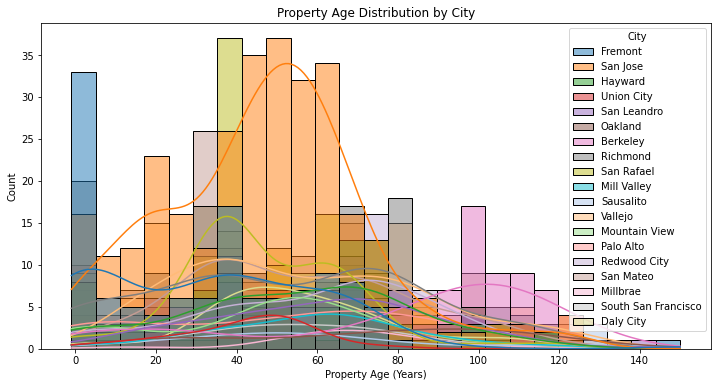

In [22]:
#distribution of propertly age  by city
plt.figure(figsize=(12, 6))
sns.histplot(data=sales_df, x='Property_Age', hue='City', kde=True ,palette = [
   "#1f77b4",  # Blue
    "#ff7f0e",  # Orange
    "#2ca02c",  # Green
    "#d62728",  # Red
    "#9467bd",  # Purple
    "#8c564b",  # Brown
    "#e377c2",  # Pink
    "#7f7f7f",  # Gray
    "#bcbd22",  # Yellow
    "#17becf",  # Cyan
    "#aec7e8",  # Light Blue
    "#ffbb78",  # Light Orange
    "#98df8a",  # Light Green
    "#ff9896",  # Light Red
    "#c5b0d5",  # Light Purple
    "#c49c94",  # Light Brown
    "#f7b6d2",  # Light Pink
    "#c7c7c7",  # Light Gray
    "#dbdb8d"   # Light Yellowue
    
])
plt.title('Property Age Distribution by City')
plt.xlabel('Property Age (Years)')
plt.ylabel('Count')
plt.show()


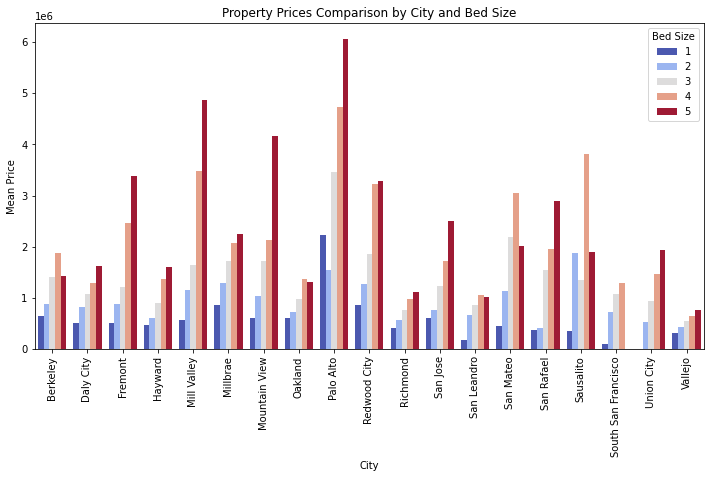

In [23]:
#mean price for each city wrt to no of beds.there are no beds in berekely and sanrafel.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

price_comp = sales_df.groupby(['City', 'Beds'])['Price'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='City', y='Price', hue='Beds', data=price_comp, palette='coolwarm')
plt.title('Property Prices Comparison by City and Bed Size')
plt.xlabel('City')
plt.ylabel('Mean Price')
plt.legend(title='Bed Size')
plt.xticks(rotation=90)
plt.show()


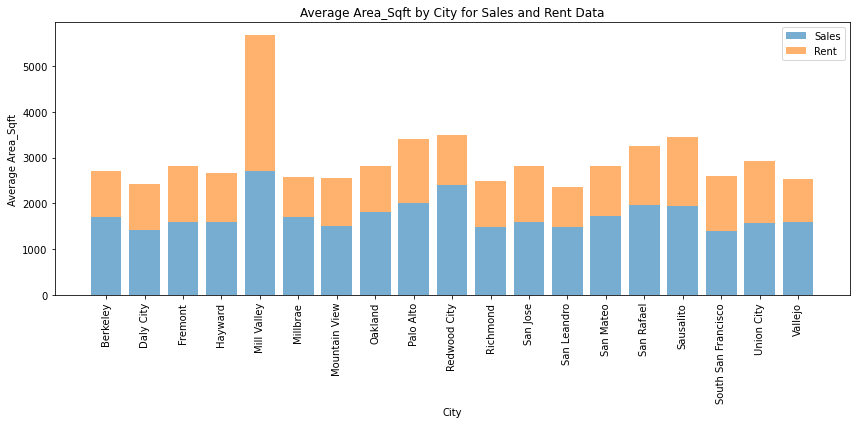

In [24]:
#Which city has highest area_sqft >>> acc to that we cangive which city has higher price per sqft
avg_area_sales = sales_df.groupby('City')['Area_Sqft'].mean().reset_index()
avg_area_rent = rental_df.groupby('City')['Area_Sqft'].mean().reset_index()

# Create a stacked bar chart
plt.figure(figsize=(12, 6))
p1 = plt.bar(avg_area_sales['City'], avg_area_sales['Area_Sqft'], label='Sales', alpha=0.6)
p2 = plt.bar(avg_area_rent['City'], avg_area_rent['Area_Sqft'], bottom=avg_area_sales['Area_Sqft'], label='Rent', alpha=0.6)

plt.xlabel('City')
plt.ylabel('Average Area_Sqft')
plt.title('Average Area_Sqft by City for Sales and Rent Data')
plt.xticks(rotation=90)
plt.legend()

plt.tight_layout()
plt.show()

In [25]:
#Total number of communities in each city and the mean price for the city.

city_sum = sales_df.groupby('City').agg({'Community': 'nunique', 'Price': 'mean'}).reset_index()
print(city_sum)

                   City  Community         Price
0              Berkeley         31  1.291289e+06
1             Daly City         10  1.003363e+06
2               Fremont         46  1.395418e+06
3               Hayward         25  9.541478e+05
4           Mill Valley          6  2.881333e+06
5              Millbrae          2  1.707235e+06
6         Mountain View          5  1.722441e+06
7               Oakland         29  1.012888e+06
8             Palo Alto         10  3.500574e+06
9          Redwood City          6  2.368143e+06
10             Richmond         48  7.358700e+05
11             San Jose         19  1.312867e+06
12          San Leandro         33  7.825769e+05
13            San Mateo         13  1.691949e+06
14           San Rafael         16  1.305179e+06
15            Sausalito          7  2.103038e+06
16  South San Francisco          3  1.007285e+06
17           Union City         13  1.067617e+06
18              Vallejo         20  5.594726e+05


In [26]:
#Average price for Newly built houses and old one.
sales_df['Year_built'] = sales_df['Year_built'].astype(int)

built_newly = sales_df[sales_df['Year_built'] > 2000]
built_old = sales_df[sales_df['Year_built'] <= 2000]
avg_price_new = round(built_newly['Price'].mean(), 2)
avg_price_old = round(built_old['Price'].mean(), 2)

print("Average Price of Newly Built Houses (After 2000):", avg_price_new)
print("Average Price of Older Houses (Before 2000):", avg_price_old)

Average Price of Newly Built Houses (After 2000): 1737034.59
Average Price of Older Houses (Before 2000): 1308297.7


**Defining numerical and categorical columns**

In [27]:
#Defining columns that are going to be used for modeling 

numerical_cols = ["Beds", 
                 "Baths",
                 "Area_Sqft",
                 "Time_on_Redfin(days)",
                 "Year_built",
                 "Lot_Size_Sqft"]
categorical_cols = [
                    "City"]

cols_to_ignore = [i for i in sales_df.columns if i not in numerical_cols + categorical_cols]
outcome = 'Price'

#Dropping rows where year built is not defined
sales_df = sales_df[sales_df['Year_built']!= 'Unknown'].copy()

In [28]:
dummyDf = pd.get_dummies(sales_df[categorical_cols], drop_first=True)
X = pd.concat([sales_df[numerical_cols],dummyDf],axis = 1)
y = sales_df[outcome]
X.shape,y.shape

((1692, 24), (1692,))

**Feature engineering**

In [29]:
from datetime import datetime
currentYear = datetime.now().year
X['Year_built'] = pd.to_numeric(X['Year_built'] )
X['num_years_since_build'] = currentYear - X['Year_built']
X.drop(columns = ['Year_built'],inplace = True,)

**Train-test split**

In [30]:
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.2, random_state=1)

In [31]:
sales_lm = LinearRegression()
sales_lm.fit(train_X, train_y)

LinearRegression()

In [38]:
# print coefficients
print('intercept ', sales_lm.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': sales_lm.coef_}))
# print performance measures
regressionSummary(valid_y, sales_lm.predict(valid_X))

intercept  -735803.7859639104
                   Predictor   coefficient
0                       Beds -8.660908e+03
1                      Baths  1.722856e+05
2                  Area_Sqft  7.931665e+02
3       Time_on_Redfin(days) -2.550519e+02
4              Lot_Size_Sqft  1.885364e-01
5             City_Daly City -9.381595e+03
6               City_Fremont  3.922754e+05
7               City_Hayward -1.986016e+05
8           City_Mill Valley  7.292333e+05
9              City_Millbrae  4.347516e+05
10        City_Mountain View  7.019046e+05
11              City_Oakland -4.156373e+05
12            City_Palo Alto  1.977868e+06
13         City_Redwood City  4.831220e+05
14             City_Richmond -2.661721e+05
15             City_San Jose  2.037265e+05
16          City_San Leandro -2.292086e+05
17            City_San Mateo  4.746880e+05
18           City_San Rafael -1.112428e+05
19            City_Sausalito  6.342852e+05
20  City_South San Francisco  3.709835e+04
21           City_Union 

In [33]:
pred_y = sales_lm.predict(valid_X)

print('adjusted r2 : ', adjusted_r2_score(valid_y, pred_y, sales_lm))
print('AIC : ', AIC_score(valid_y, pred_y, sales_lm))
print('BIC : ', BIC_score(valid_y, pred_y, sales_lm))

adjusted r2 :  0.7359948951475044
AIC :  9987.655664104654
BIC :  10087.131666896545


**Decision Tree regression**

In [34]:
# import the regressor 
from sklearn.tree import DecisionTreeRegressor
from dmba import plotDecisionTree, classificationSummary, regressionSummary
# create a regressor object 
regressor = DecisionTreeRegressor(random_state = 0)  
  
# fit the regressor with X and Y data 
regressor.fit(train_X, train_y)

DecisionTreeRegressor(random_state=0)

In [37]:
pred_y = regressor.predict(valid_X)
regressionSummary(valid_y,pred_y)


Regression statistics

                      Mean Error (ME) : -60066.2507
       Root Mean Squared Error (RMSE) : 852834.1385
            Mean Absolute Error (MAE) : 388297.5310
          Mean Percentage Error (MPE) : -13.8241
Mean Absolute Percentage Error (MAPE) : 34.3191


<AxesSubplot:>

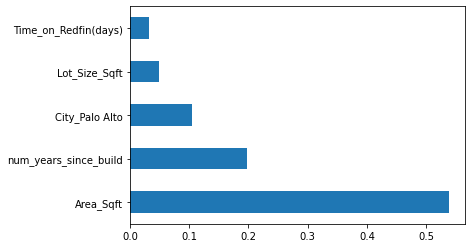

In [39]:
feat_importances = pd.Series(regressor.feature_importances_, index=train_X.columns)
feat_importances.nlargest(5).plot(kind='barh')

**From the above plot we see that Area is the most important factor in terms of determining price of the house followed by the of years it was built**